In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

c:\Users\User\.conda\envs\dl\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
### GPU 사용 확인 ###

print(f'GPU 사용가능 여부: {torch.cuda.is_available()}')
print(f'GPU 사용가능 개수 : {torch.cuda.device_count()}')
print(f'GPU 정보 반환 :  {torch.cuda.get_device_name(0)}')

GPU 사용가능 여부: True
GPU 사용가능 개수 : 2
GPU 정보 반환 :  NVIDIA GeForce RTX 2080 Ti


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
# 라이브러리 임포트
import torchvision.datasets as datasets

# 다운로드받을 디렉터리명
data_root = './data'

train_set0 = datasets.MNIST(
    # 원본 데이터를 다운로드받을 디렉터리 지정
    root = data_root,  
    # 훈련 데이터인지 또는 검증 데이터인지
    train = True,  
    # 원본 데이터가 없는 경우, 다운로드를 실행하는지 여부
    download = True)

스텝 1. ToTensor 사용하기

In [5]:
# 라이브러리 임포트
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,  train=True,  download=True,
    transform = transform1)

In [6]:
# 변환 결과 확인

image, label = train_set1[0]
print('입력 데이터 타입 : ', type(image))
print('입력 데이터 shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

입력 데이터 타입 :  <class 'torch.Tensor'>
입력 데이터 shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(0.)
최댓값 :  tensor(1.)


스텝 2. Normalize 사용하기

In [7]:
transform2 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),
    
    # 데이터 정규화
    transforms.Normalize(0.5,  0.5),
])

train_set2 = datasets.MNIST(
    root = data_root,  train = True,  download = True,
    transform = transform2)

In [8]:
# 변환 결과 확인

image, label = train_set2[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape :  torch.Size([1, 28, 28])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


스텝 3. Lambda 클래스를 사용해 1차원으로 텐서 변환하기

In [9]:
transform3 = transforms.Compose([
    # 데이터를 텐서로 변환
    transforms.ToTensor(),
    
    # 데이터 정규화
    transforms.Normalize(0.5, 0.5),
    
    # 현재 텐서를 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),
])

train_set3 = datasets.MNIST(
    root = data_root,  train = True,  
    download=True, transform = transform3)

In [10]:
# 변환 결과 확인

image, label = train_set3[0]
print('shape : ', image.shape)
print('최솟값 : ', image.data.min())
print('최댓값 : ', image.data.max())

shape :  torch.Size([784])
최솟값 :  tensor(-1.)
최댓값 :  tensor(1.)


최종 구현 형태

In [11]:
# 데이터 변환용 함수 Transforms
# (1) Image를 텐서화
# (2) [0, 1] 범위의 값을 [-1, 1] 범위로 조정
# (3) 데이터의 shape을 [1, 28, 28] 에서 [784] 로 변환

transform = transforms.Compose([
    # (1) 데이터를 텐서로 변환
    transforms.ToTensor(),
    
    # (2) 데이터 정규화
    transforms.Normalize(0.5, 0.5),
    
    # (3) 1계 텐서로 변환
    transforms.Lambda(lambda x: x.view(-1)),
])

In [12]:
# 데이터 입수를 위한 Dataset 함수

# 훈련용 데이터셋 정의
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# 검증용 데이터셋 정의
test_set = datasets.MNIST(
    root = data_root, train = False, 
    download = True, transform = transform)

데이터 준비 3 (데이터로더를 활용한 미니 배치 데이터 생성)

In [13]:
# 라이브러리 임포트
from torch.utils.data import DataLoader

# 미니 배치 사이즈 지정
batch_size = 500

# 훈련용 데이터로더
# 훈련용이므로, 셔플을 적용함
train_loader = DataLoader(
    train_set, batch_size = batch_size, 
    shuffle = True)

# 검증용 데이터로더
# 검증시에는 셔플을 필요로하지 않음
test_loader = DataLoader(
    test_set,  batch_size = batch_size, 
    shuffle = False)

In [14]:
# 몇 개의 그룹으로 데이터를 가져올 수 있는가
print(len(train_loader))

# 데이터로더로부터 가장 처음 한 세트를 가져옴
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


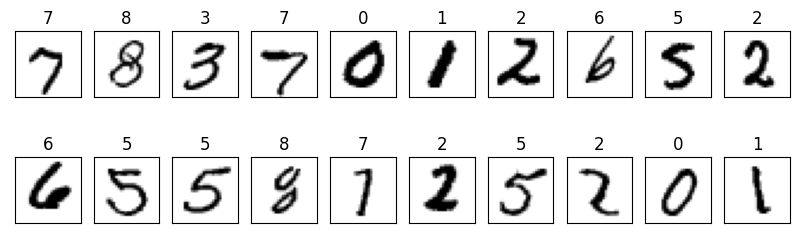

In [15]:
import matplotlib.pyplot as plt

# 이미지 출력
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)
    
    # 넘파이로 배열로 변환
    image = images[i].numpy()
    label = labels[i]
    
    # 이미지의 범위를 [0, 1] 로 되돌림
    image2 = (image + 1)/ 2

    # 이미지 출력
    plt.imshow(image2.reshape(28, 28),cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

모델 정의

In [16]:
# 입력 차원수
n_input = image.shape[0]

# 출력 차원수
# 분류 클래스 수는 10
n_output = len(set(list(labels.data.numpy())))

# 은닉층의 노드 수
n_hidden = 128

# 결과 확인
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 784  n_hidden: 128 n_output: 10


In [17]:
# 모델 정의
# 784입력 10출력 1은닉층의 신경망 모델

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 은닉층 정의(은닉층 노드 수 : n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 출력층 정의
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU 함수 정의
        self.relu = nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [18]:
# 난수 고정
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# 모델 인스턴스 생성
net = Net(n_input, n_output, n_hidden)

# 모델을 GPU로 전송
net = net.to(device)

In [19]:
# 학습률
lr = 0.01

# 최적화 알고리즘: 경사 하강법
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# 손실 함수： 교차 엔트로피 함수
criterion = nn.CrossEntropyLoss()

In [20]:
# 모델 내부 파라미터 확인
# l1.weight, l1.bias, l2.weight, l2.bias를 확인할 수 있음

for parameter in net.named_parameters():
    print(parameter)

('l1.weight', Parameter containing:
tensor([[-0.0146,  0.0012, -0.0177,  ...,  0.0277,  0.0200,  0.0315],
        [ 0.0184, -0.0322,  0.0175,  ...,  0.0089, -0.0028, -0.0033],
        [ 0.0092,  0.0261,  0.0075,  ...,  0.0061,  0.0267, -0.0258],
        ...,
        [ 0.0235, -0.0026, -0.0129,  ...,  0.0322, -0.0059, -0.0169],
        [-0.0328, -0.0258,  0.0124,  ..., -0.0049,  0.0006,  0.0334],
        [ 0.0187, -0.0076, -0.0202,  ...,  0.0325, -0.0159, -0.0240]],
       device='cuda:0', requires_grad=True))
('l1.bias', Parameter containing:
tensor([ 0.0325, -0.0298,  0.0013,  0.0199,  0.0268, -0.0248, -0.0172, -0.0355,
         0.0122, -0.0048,  0.0214,  0.0202, -0.0243,  0.0015, -0.0276,  0.0296,
         0.0341, -0.0228,  0.0230,  0.0347, -0.0091, -0.0346,  0.0206, -0.0060,
         0.0329,  0.0047,  0.0180,  0.0101,  0.0177, -0.0309,  0.0228, -0.0224,
         0.0321,  0.0179,  0.0321,  0.0184,  0.0219, -0.0089,  0.0310, -0.0039,
        -0.0074, -0.0317,  0.0192, -0.0021,  0.0190

In [21]:
# 모델 개요 표시 1

print(net)

Net(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [22]:
from torchinfo import summary
# 모델 개요 표시 2

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [10]                      1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
Total mult-adds (M): 12.87
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.41
Estimated Total Size (MB): 0.41

In [23]:
for images, labels in train_loader:
    break 

# GPU로 보내야함 
inputs = images.to(device)
labels = labels.to(device) 

# 예측 계산 
outputs = net(inputs)
print(outputs)

tensor([[-0.2607, -0.1033, -0.0152,  ...,  0.2063,  0.2565, -0.1193],
        [-0.2608, -0.0720,  0.3163,  ...,  0.1855,  0.1606,  0.1588],
        [-0.4269, -0.2623,  0.1441,  ...,  0.2018,  0.2342,  0.0672],
        ...,
        [-0.2676, -0.3111, -0.0057,  ...,  0.1547,  0.1451, -0.0789],
        [-0.2307, -0.1587,  0.2425,  ...,  0.1599,  0.0511,  0.0556],
        [-0.0567, -0.2656,  0.3652,  ...,  0.1721, -0.0566, -0.0515]],
       device='cuda:0', grad_fn=<AddmmBackward>)


2.326763868331909


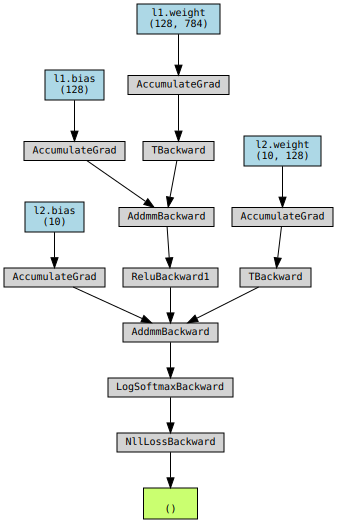

In [24]:
from torchviz import make_dot

loss = criterion(outputs, labels)
print(loss.item()) # 손실값 가져오기 
make_dot(loss, params=dict(net.named_parameters()))

In [25]:
torch.manual_seed(123)
torch.cuda.manual_seed(123)

lr=0.01

# 모델 초기화 
net = Net(n_input, n_output, n_hidden).to(device)

critetion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr)
num_epochs = 100
history2 = np.zeros((0,5))


from tqdm import tqdm

# 반복 계산 메인 루프 
for epoch in range(num_epochs):
    train_acc, train_loss = 0, 0
    val_acc, val_loss = 0, 0
    n_train, n_test = 0, 0

    # 훈련 페이즈 
    for inputs, labels in tqdm(train_loader):
        n_train += len(labels)

        # GPU 전송
        inputs = inputs.to(device)
        labels = labels.to(device)

        # 경사 초기화 
        optimizer.zero_grad()
        
        # 예측 계산
        outputs = net(inputs)
        
        # 손실 계산
        loss = criterion(outputs, labels)

        # 경사 계산 
        loss.backward()

        # 파라미터 수정 
        optimizer.step() 


    # 예측 페이즈 
    for inputs_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)

        # 예측 계산
        outputs_test = net(inputs_test)

        # 손실 계산 
        loss_test = criterion(outputs_test, labels_test)

        # 예측 라벨 산출
        predicted_test = torch.max(outputs_test, 1)[1]

        # 손실과 정확도 계산 
        val_loss += loss_test.item() 
        val_acc += (predicted_test == labels_test).sum().item()


# 평가 결과 산출, 기록
    train_acc = train_acc / n_train
    val_acc = val_acc / n_test
    train_loss = train_loss * batch_size / n_train
    val_loss = val_loss * batch_size / n_test
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
    item = np.array([epoch+1 , train_loss, train_acc, val_loss, val_acc])
    history2 = np.vstack((history2, item))












100%|██████████| 120/120 [00:08<00:00, 14.17it/s]


Epoch [1/100], loss: 0.00000 acc: 0.00000 val_loss: 1.32709, val_acc: 0.73700


100%|██████████| 120/120 [00:08<00:00, 14.18it/s]


Epoch [2/100], loss: 0.00000 acc: 0.00000 val_loss: 0.79728, val_acc: 0.83640


100%|██████████| 120/120 [00:08<00:00, 13.69it/s]


Epoch [3/100], loss: 0.00000 acc: 0.00000 val_loss: 0.60302, val_acc: 0.85960


100%|██████████| 120/120 [00:08<00:00, 13.72it/s]


Epoch [4/100], loss: 0.00000 acc: 0.00000 val_loss: 0.51246, val_acc: 0.87120


100%|██████████| 120/120 [00:08<00:00, 13.93it/s]


Epoch [5/100], loss: 0.00000 acc: 0.00000 val_loss: 0.45812, val_acc: 0.87940


100%|██████████| 120/120 [00:08<00:00, 13.89it/s]


Epoch [6/100], loss: 0.00000 acc: 0.00000 val_loss: 0.42407, val_acc: 0.88680


100%|██████████| 120/120 [00:08<00:00, 13.69it/s]


Epoch [7/100], loss: 0.00000 acc: 0.00000 val_loss: 0.39993, val_acc: 0.89010


100%|██████████| 120/120 [00:08<00:00, 13.66it/s]


Epoch [8/100], loss: 0.00000 acc: 0.00000 val_loss: 0.38284, val_acc: 0.89330


100%|██████████| 120/120 [00:08<00:00, 14.12it/s]


Epoch [9/100], loss: 0.00000 acc: 0.00000 val_loss: 0.36841, val_acc: 0.89680


100%|██████████| 120/120 [00:08<00:00, 13.59it/s]


Epoch [10/100], loss: 0.00000 acc: 0.00000 val_loss: 0.35744, val_acc: 0.89900


100%|██████████| 120/120 [00:08<00:00, 13.83it/s]


Epoch [11/100], loss: 0.00000 acc: 0.00000 val_loss: 0.34819, val_acc: 0.90130


100%|██████████| 120/120 [00:08<00:00, 13.93it/s]


Epoch [12/100], loss: 0.00000 acc: 0.00000 val_loss: 0.34020, val_acc: 0.90330


100%|██████████| 120/120 [00:08<00:00, 14.04it/s]


Epoch [13/100], loss: 0.00000 acc: 0.00000 val_loss: 0.33519, val_acc: 0.90420


100%|██████████| 120/120 [00:08<00:00, 13.64it/s]


Epoch [14/100], loss: 0.00000 acc: 0.00000 val_loss: 0.32816, val_acc: 0.90770


100%|██████████| 120/120 [00:08<00:00, 14.05it/s]


Epoch [15/100], loss: 0.00000 acc: 0.00000 val_loss: 0.32274, val_acc: 0.90840


100%|██████████| 120/120 [00:08<00:00, 13.81it/s]


Epoch [16/100], loss: 0.00000 acc: 0.00000 val_loss: 0.31798, val_acc: 0.90810


100%|██████████| 120/120 [00:08<00:00, 14.03it/s]


Epoch [17/100], loss: 0.00000 acc: 0.00000 val_loss: 0.31324, val_acc: 0.90870


100%|██████████| 120/120 [00:08<00:00, 13.73it/s]


Epoch [18/100], loss: 0.00000 acc: 0.00000 val_loss: 0.30976, val_acc: 0.91080


100%|██████████| 120/120 [00:08<00:00, 13.98it/s]


Epoch [19/100], loss: 0.00000 acc: 0.00000 val_loss: 0.30643, val_acc: 0.91270


100%|██████████| 120/120 [00:08<00:00, 13.84it/s]


Epoch [20/100], loss: 0.00000 acc: 0.00000 val_loss: 0.30323, val_acc: 0.91340


100%|██████████| 120/120 [00:08<00:00, 13.93it/s]


Epoch [21/100], loss: 0.00000 acc: 0.00000 val_loss: 0.29928, val_acc: 0.91510


100%|██████████| 120/120 [00:08<00:00, 14.02it/s]


Epoch [22/100], loss: 0.00000 acc: 0.00000 val_loss: 0.29689, val_acc: 0.91600


100%|██████████| 120/120 [00:08<00:00, 13.63it/s]


Epoch [23/100], loss: 0.00000 acc: 0.00000 val_loss: 0.29413, val_acc: 0.91520


100%|██████████| 120/120 [00:08<00:00, 13.86it/s]


Epoch [24/100], loss: 0.00000 acc: 0.00000 val_loss: 0.29173, val_acc: 0.91610


100%|██████████| 120/120 [00:08<00:00, 13.83it/s]


Epoch [25/100], loss: 0.00000 acc: 0.00000 val_loss: 0.28941, val_acc: 0.91790


100%|██████████| 120/120 [00:08<00:00, 13.39it/s]


Epoch [26/100], loss: 0.00000 acc: 0.00000 val_loss: 0.28609, val_acc: 0.91840


100%|██████████| 120/120 [00:08<00:00, 13.90it/s]


Epoch [27/100], loss: 0.00000 acc: 0.00000 val_loss: 0.28441, val_acc: 0.91970


100%|██████████| 120/120 [00:08<00:00, 13.82it/s]


Epoch [28/100], loss: 0.00000 acc: 0.00000 val_loss: 0.28163, val_acc: 0.91870


100%|██████████| 120/120 [00:08<00:00, 14.17it/s]


Epoch [29/100], loss: 0.00000 acc: 0.00000 val_loss: 0.27873, val_acc: 0.92050


100%|██████████| 120/120 [00:08<00:00, 14.12it/s]


Epoch [30/100], loss: 0.00000 acc: 0.00000 val_loss: 0.27697, val_acc: 0.92110


100%|██████████| 120/120 [00:08<00:00, 13.77it/s]


Epoch [31/100], loss: 0.00000 acc: 0.00000 val_loss: 0.27481, val_acc: 0.92110


100%|██████████| 120/120 [00:08<00:00, 14.17it/s]


Epoch [32/100], loss: 0.00000 acc: 0.00000 val_loss: 0.27255, val_acc: 0.92210


100%|██████████| 120/120 [00:08<00:00, 13.96it/s]


Epoch [33/100], loss: 0.00000 acc: 0.00000 val_loss: 0.27097, val_acc: 0.92260


100%|██████████| 120/120 [00:08<00:00, 14.05it/s]


Epoch [34/100], loss: 0.00000 acc: 0.00000 val_loss: 0.26819, val_acc: 0.92430


100%|██████████| 120/120 [00:08<00:00, 13.91it/s]


Epoch [35/100], loss: 0.00000 acc: 0.00000 val_loss: 0.26619, val_acc: 0.92350


100%|██████████| 120/120 [00:08<00:00, 14.19it/s]


Epoch [36/100], loss: 0.00000 acc: 0.00000 val_loss: 0.26494, val_acc: 0.92420


100%|██████████| 120/120 [00:08<00:00, 14.00it/s]


Epoch [37/100], loss: 0.00000 acc: 0.00000 val_loss: 0.26234, val_acc: 0.92460


100%|██████████| 120/120 [00:08<00:00, 14.06it/s]


Epoch [38/100], loss: 0.00000 acc: 0.00000 val_loss: 0.26119, val_acc: 0.92620


100%|██████████| 120/120 [00:08<00:00, 13.77it/s]


Epoch [39/100], loss: 0.00000 acc: 0.00000 val_loss: 0.25866, val_acc: 0.92590


100%|██████████| 120/120 [00:08<00:00, 13.69it/s]


Epoch [40/100], loss: 0.00000 acc: 0.00000 val_loss: 0.25693, val_acc: 0.92690


100%|██████████| 120/120 [00:08<00:00, 13.98it/s]


Epoch [41/100], loss: 0.00000 acc: 0.00000 val_loss: 0.25644, val_acc: 0.92740


100%|██████████| 120/120 [00:08<00:00, 14.11it/s]


Epoch [42/100], loss: 0.00000 acc: 0.00000 val_loss: 0.25289, val_acc: 0.92770


100%|██████████| 120/120 [00:08<00:00, 13.88it/s]


Epoch [43/100], loss: 0.00000 acc: 0.00000 val_loss: 0.25115, val_acc: 0.92830


100%|██████████| 120/120 [00:08<00:00, 14.02it/s]


Epoch [44/100], loss: 0.00000 acc: 0.00000 val_loss: 0.25133, val_acc: 0.92900


100%|██████████| 120/120 [00:08<00:00, 13.76it/s]


Epoch [45/100], loss: 0.00000 acc: 0.00000 val_loss: 0.24776, val_acc: 0.92910


100%|██████████| 120/120 [00:08<00:00, 13.82it/s]


Epoch [46/100], loss: 0.00000 acc: 0.00000 val_loss: 0.24704, val_acc: 0.92900


100%|██████████| 120/120 [00:08<00:00, 13.87it/s]


Epoch [47/100], loss: 0.00000 acc: 0.00000 val_loss: 0.24341, val_acc: 0.93070


100%|██████████| 120/120 [00:08<00:00, 14.11it/s]


Epoch [48/100], loss: 0.00000 acc: 0.00000 val_loss: 0.24247, val_acc: 0.93140


100%|██████████| 120/120 [00:08<00:00, 14.03it/s]


Epoch [49/100], loss: 0.00000 acc: 0.00000 val_loss: 0.24058, val_acc: 0.93160


100%|██████████| 120/120 [00:08<00:00, 14.15it/s]


Epoch [50/100], loss: 0.00000 acc: 0.00000 val_loss: 0.23849, val_acc: 0.93210


100%|██████████| 120/120 [00:08<00:00, 14.04it/s]


Epoch [51/100], loss: 0.00000 acc: 0.00000 val_loss: 0.23675, val_acc: 0.93340


100%|██████████| 120/120 [00:08<00:00, 13.87it/s]


Epoch [52/100], loss: 0.00000 acc: 0.00000 val_loss: 0.23514, val_acc: 0.93340


100%|██████████| 120/120 [00:08<00:00, 14.01it/s]


Epoch [53/100], loss: 0.00000 acc: 0.00000 val_loss: 0.23325, val_acc: 0.93400


100%|██████████| 120/120 [00:08<00:00, 14.09it/s]


Epoch [54/100], loss: 0.00000 acc: 0.00000 val_loss: 0.23128, val_acc: 0.93460


100%|██████████| 120/120 [00:08<00:00, 14.06it/s]


Epoch [55/100], loss: 0.00000 acc: 0.00000 val_loss: 0.22960, val_acc: 0.93400


100%|██████████| 120/120 [00:08<00:00, 13.89it/s]


Epoch [56/100], loss: 0.00000 acc: 0.00000 val_loss: 0.22790, val_acc: 0.93570


100%|██████████| 120/120 [00:08<00:00, 14.12it/s]


Epoch [57/100], loss: 0.00000 acc: 0.00000 val_loss: 0.22646, val_acc: 0.93600


100%|██████████| 120/120 [00:08<00:00, 13.96it/s]


Epoch [58/100], loss: 0.00000 acc: 0.00000 val_loss: 0.22494, val_acc: 0.93640


100%|██████████| 120/120 [00:08<00:00, 13.97it/s]


Epoch [59/100], loss: 0.00000 acc: 0.00000 val_loss: 0.22299, val_acc: 0.93660


100%|██████████| 120/120 [00:08<00:00, 13.69it/s]


Epoch [60/100], loss: 0.00000 acc: 0.00000 val_loss: 0.22136, val_acc: 0.93690


100%|██████████| 120/120 [00:08<00:00, 13.95it/s]


Epoch [61/100], loss: 0.00000 acc: 0.00000 val_loss: 0.22064, val_acc: 0.93710


100%|██████████| 120/120 [00:08<00:00, 13.91it/s]


Epoch [62/100], loss: 0.00000 acc: 0.00000 val_loss: 0.21771, val_acc: 0.93750


100%|██████████| 120/120 [00:08<00:00, 13.98it/s]


Epoch [63/100], loss: 0.00000 acc: 0.00000 val_loss: 0.21712, val_acc: 0.93760


100%|██████████| 120/120 [00:08<00:00, 13.79it/s]


Epoch [64/100], loss: 0.00000 acc: 0.00000 val_loss: 0.21517, val_acc: 0.93820


100%|██████████| 120/120 [00:08<00:00, 13.76it/s]


Epoch [65/100], loss: 0.00000 acc: 0.00000 val_loss: 0.21317, val_acc: 0.93930


100%|██████████| 120/120 [00:08<00:00, 14.14it/s]


Epoch [66/100], loss: 0.00000 acc: 0.00000 val_loss: 0.21176, val_acc: 0.93980


100%|██████████| 120/120 [00:08<00:00, 13.92it/s]


Epoch [67/100], loss: 0.00000 acc: 0.00000 val_loss: 0.21070, val_acc: 0.93860


100%|██████████| 120/120 [00:08<00:00, 14.25it/s]


Epoch [68/100], loss: 0.00000 acc: 0.00000 val_loss: 0.20883, val_acc: 0.93940


100%|██████████| 120/120 [00:08<00:00, 13.87it/s]


Epoch [69/100], loss: 0.00000 acc: 0.00000 val_loss: 0.20718, val_acc: 0.93990


100%|██████████| 120/120 [00:08<00:00, 13.98it/s]


Epoch [70/100], loss: 0.00000 acc: 0.00000 val_loss: 0.20630, val_acc: 0.94070


100%|██████████| 120/120 [00:08<00:00, 13.79it/s]


Epoch [71/100], loss: 0.00000 acc: 0.00000 val_loss: 0.20516, val_acc: 0.93990


100%|██████████| 120/120 [00:08<00:00, 13.92it/s]


Epoch [72/100], loss: 0.00000 acc: 0.00000 val_loss: 0.20327, val_acc: 0.94020


100%|██████████| 120/120 [00:08<00:00, 13.90it/s]


Epoch [73/100], loss: 0.00000 acc: 0.00000 val_loss: 0.20180, val_acc: 0.94230


100%|██████████| 120/120 [00:08<00:00, 13.92it/s]


Epoch [74/100], loss: 0.00000 acc: 0.00000 val_loss: 0.20043, val_acc: 0.94280


100%|██████████| 120/120 [00:08<00:00, 13.38it/s]


Epoch [75/100], loss: 0.00000 acc: 0.00000 val_loss: 0.19939, val_acc: 0.94210


100%|██████████| 120/120 [00:08<00:00, 13.46it/s]


Epoch [76/100], loss: 0.00000 acc: 0.00000 val_loss: 0.19780, val_acc: 0.94320


100%|██████████| 120/120 [00:08<00:00, 13.75it/s]


Epoch [77/100], loss: 0.00000 acc: 0.00000 val_loss: 0.19624, val_acc: 0.94280


100%|██████████| 120/120 [00:08<00:00, 13.94it/s]


Epoch [78/100], loss: 0.00000 acc: 0.00000 val_loss: 0.19682, val_acc: 0.94260


100%|██████████| 120/120 [00:08<00:00, 13.78it/s]


Epoch [79/100], loss: 0.00000 acc: 0.00000 val_loss: 0.19369, val_acc: 0.94360


100%|██████████| 120/120 [00:09<00:00, 13.30it/s]


Epoch [80/100], loss: 0.00000 acc: 0.00000 val_loss: 0.19320, val_acc: 0.94300


100%|██████████| 120/120 [00:08<00:00, 13.75it/s]


Epoch [81/100], loss: 0.00000 acc: 0.00000 val_loss: 0.19105, val_acc: 0.94460


100%|██████████| 120/120 [00:08<00:00, 13.56it/s]


Epoch [82/100], loss: 0.00000 acc: 0.00000 val_loss: 0.19026, val_acc: 0.94540


100%|██████████| 120/120 [00:08<00:00, 13.68it/s]


Epoch [83/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18917, val_acc: 0.94480


100%|██████████| 120/120 [00:08<00:00, 13.67it/s]


Epoch [84/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18802, val_acc: 0.94480


100%|██████████| 120/120 [00:08<00:00, 13.37it/s]


Epoch [85/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18650, val_acc: 0.94530


100%|██████████| 120/120 [00:08<00:00, 13.70it/s]


Epoch [86/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18525, val_acc: 0.94640


100%|██████████| 120/120 [00:08<00:00, 13.43it/s]


Epoch [87/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18406, val_acc: 0.94630


100%|██████████| 120/120 [00:08<00:00, 13.44it/s]


Epoch [88/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18266, val_acc: 0.94650


100%|██████████| 120/120 [00:08<00:00, 13.77it/s]


Epoch [89/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18173, val_acc: 0.94720


100%|██████████| 120/120 [00:08<00:00, 13.93it/s]


Epoch [90/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18065, val_acc: 0.94740


100%|██████████| 120/120 [00:08<00:00, 13.54it/s]


Epoch [91/100], loss: 0.00000 acc: 0.00000 val_loss: 0.18017, val_acc: 0.94720


100%|██████████| 120/120 [00:08<00:00, 13.90it/s]


Epoch [92/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17872, val_acc: 0.94780


100%|██████████| 120/120 [00:08<00:00, 13.64it/s]


Epoch [93/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17738, val_acc: 0.94790


100%|██████████| 120/120 [00:08<00:00, 13.77it/s]


Epoch [94/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17653, val_acc: 0.94800


100%|██████████| 120/120 [00:08<00:00, 13.76it/s]


Epoch [95/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17544, val_acc: 0.94750


100%|██████████| 120/120 [00:08<00:00, 13.64it/s]


Epoch [96/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17444, val_acc: 0.94810


100%|██████████| 120/120 [00:08<00:00, 13.50it/s]


Epoch [97/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17346, val_acc: 0.94870


100%|██████████| 120/120 [00:08<00:00, 13.91it/s]


Epoch [98/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17270, val_acc: 0.94850


100%|██████████| 120/120 [00:08<00:00, 13.73it/s]


Epoch [99/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17237, val_acc: 0.94880


100%|██████████| 120/120 [00:08<00:00, 13.75it/s]


Epoch [100/100], loss: 0.00000 acc: 0.00000 val_loss: 0.17155, val_acc: 0.94870


In [28]:
# 결과 확인

print(f'초기상태 : 손실 : {history2[0,3]:.5f} 정확도 : {history2[0,4]:.5f}')
print(f'최종상태 : 손실 : {history2[-1,3]:.5f} 정확도 : {history2[-1,4]:.5f}')

초기상태 : 손실 : 1.32709 정확도 : 0.73700
최종상태 : 손실 : 0.17155 정확도 : 0.94870


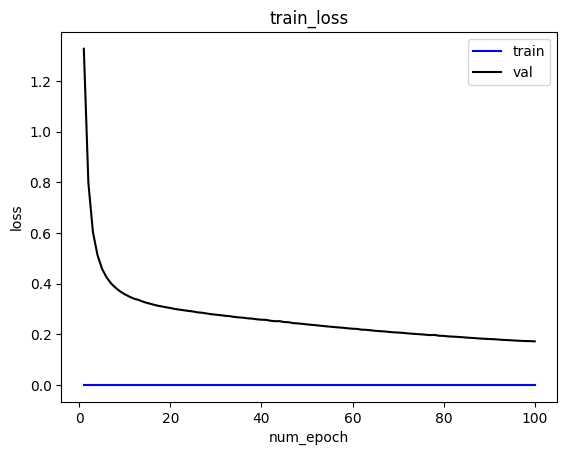

In [31]:
plt.plot(history2[:,0], history2[:,1], 'b', label='train')
plt.plot(history2[:,0], history2[:,3], 'k', label='val')
plt.xlabel('num_epoch')
plt.ylabel('loss')
plt.title('train_loss')
plt.legend()
plt.show()